In [114]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style ="whitegrid", color_codes = True)
import os as os
import xgboost
path = '/Users/apple/Downloads/data/'
os.chdir(os.path.join(path))
os.getcwd()

'/Users/apple/Downloads/data'

In [108]:
obesity = pd.read_csv('obesity.csv',sep= ",")
obesity.rename({'NObeyesdad' : 'Target',
                'family_history_with_overweight': 'Overweight'}, axis=1, inplace= True)
replace_vals = {'Normal_Weight' : 0, 
                'Overweight_Level_I': 0,
                'Overweight_Level_II': 1,
                'Obesity_Type_I' : 1,
                'Insufficient_Weight': 0,
                'Obesity_Type_II' : 1,
                'Obesity_Type_III': 1
                }
obesity.replace({'Target' : replace_vals}, inplace= True)
num_cols = [i for i in obesity.columns if obesity[i].dtypes == 'float64']
cat_cols = [i for i in obesity.columns if obesity[i].dtypes == 'O']

In [45]:
obesity[num_cols].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [109]:
obesity[cat_cols].describe()

,Gender,Overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
count,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
freq,1068,1726,1866,1765,2067,2015,1401,1580


## Visualizations Univariate/ Bivariate/ Multiple columns 

Text(0.5, 1.0, 'Distribution of Obesity with Age')

<Figure size 700x500 with 0 Axes>

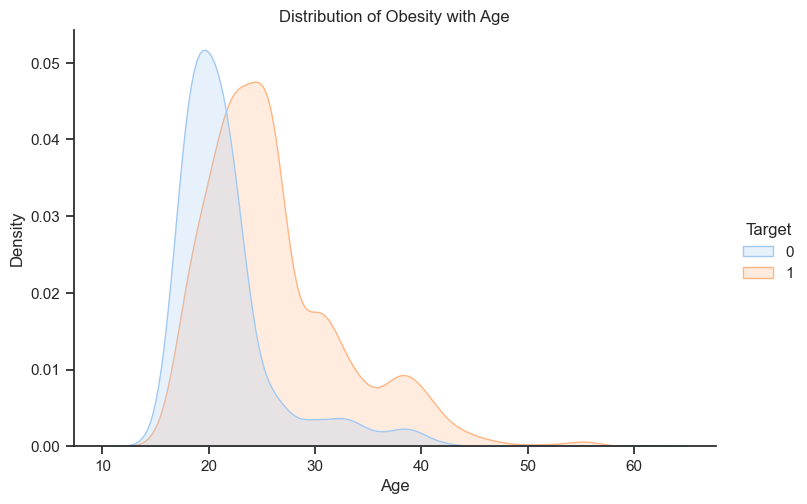

In [80]:
sns.set_style("ticks" , {'axes.grid' : False})
plt.figure(figsize=(7,5))
sns.displot(data = obesity, x = 'Age', hue='Target', kind= 'kde', fill = True, palette= "pastel", height=5, aspect=1.5)
plt.title("Distribution of Obesity with Age")

<Figure size 600x300 with 0 Axes>

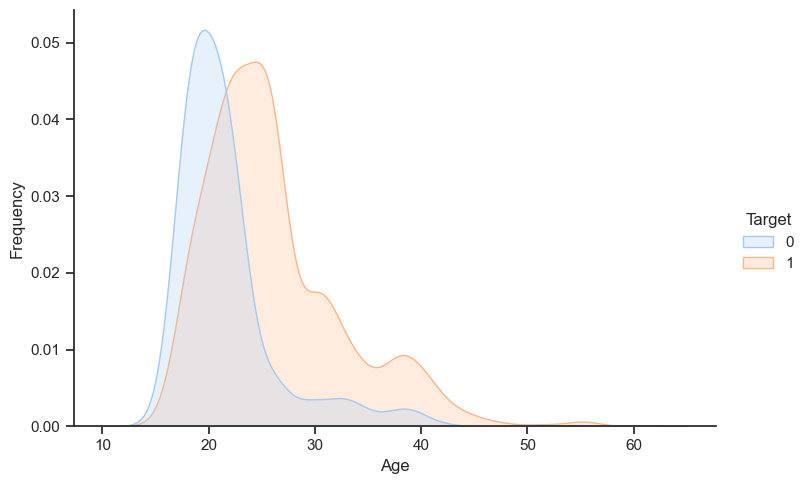

<Figure size 400x200 with 0 Axes>

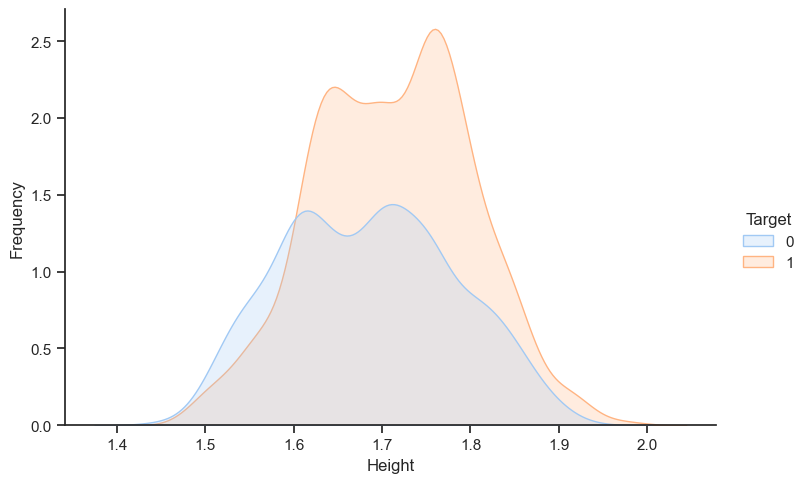

<Figure size 400x200 with 0 Axes>

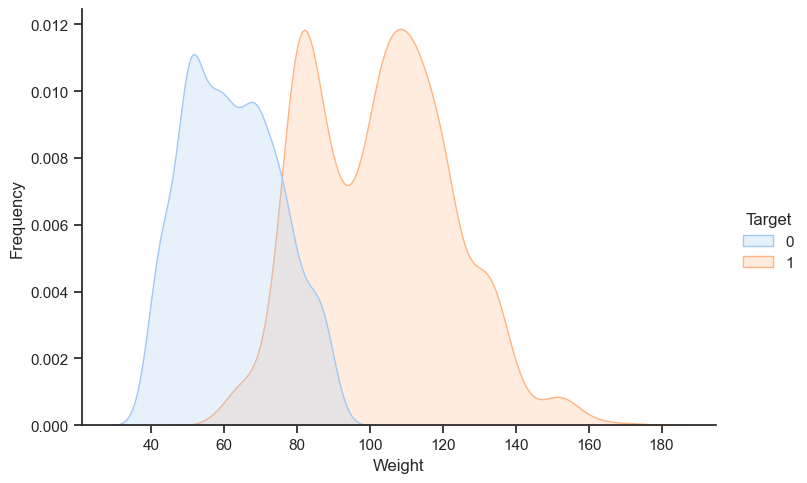

<Figure size 400x200 with 0 Axes>

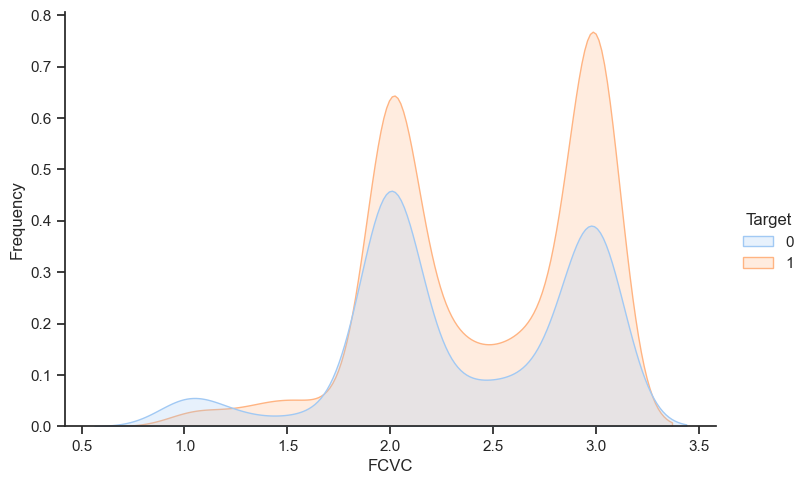

<Figure size 400x200 with 0 Axes>

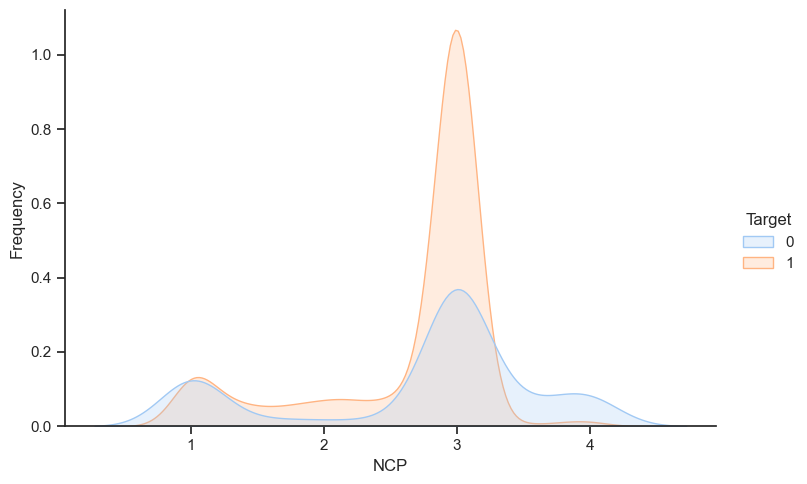

<Figure size 400x200 with 0 Axes>

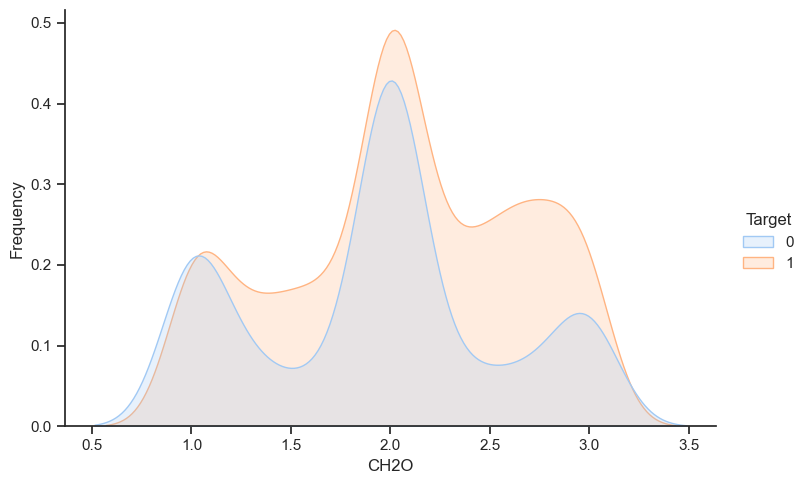

<Figure size 400x200 with 0 Axes>

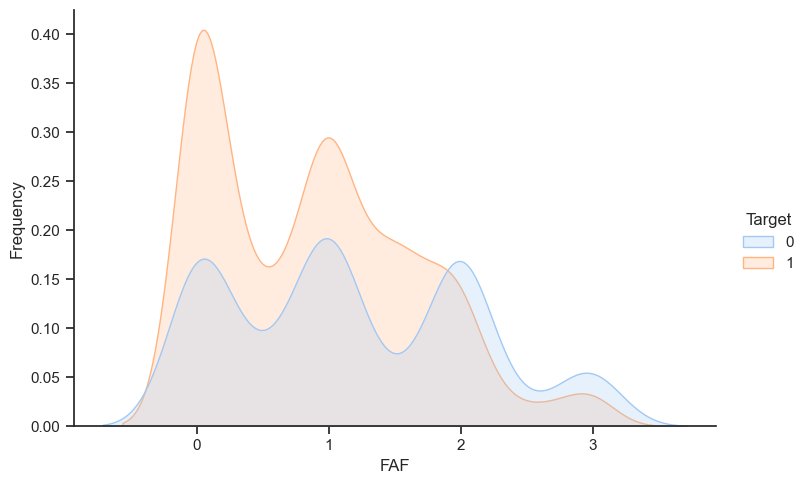

<Figure size 400x200 with 0 Axes>

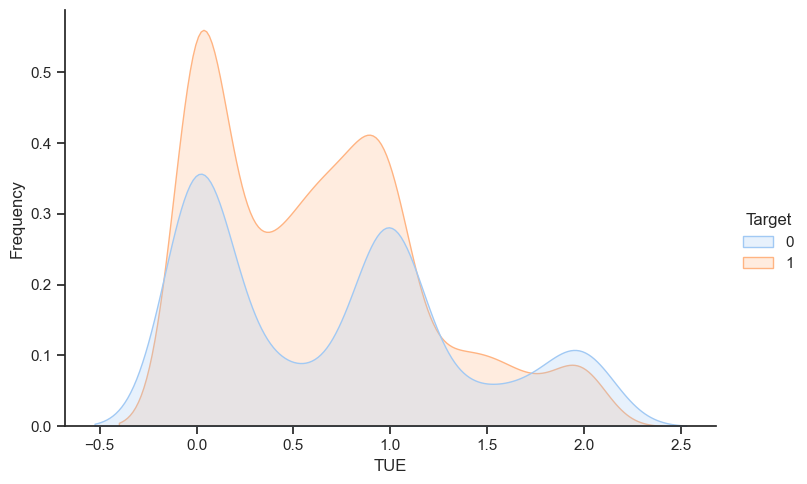

In [102]:
sns.set_style("ticks" , {'axes.grid' : False})
plt.figure(figsize = (6,3))
for col in num_cols:
    plt.tight_layout()
    sns.displot(data = obesity, x = col, hue='Target', kind= 'kde', fill = True, palette= "pastel", height=5, aspect=1.5)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


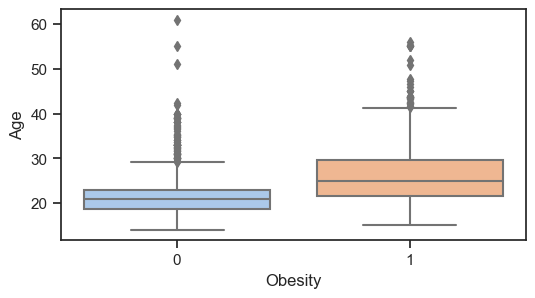

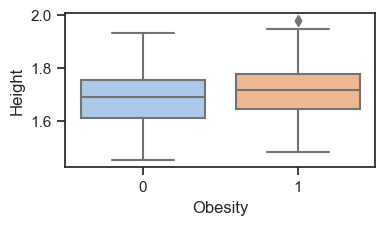

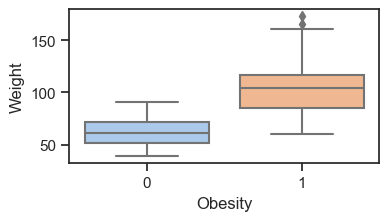

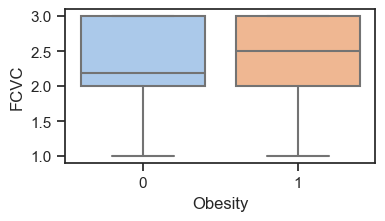

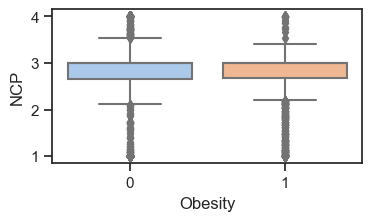

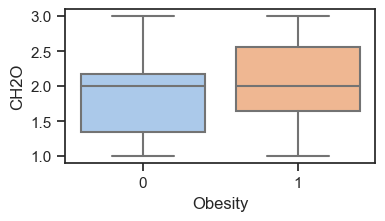

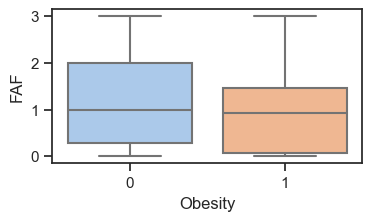

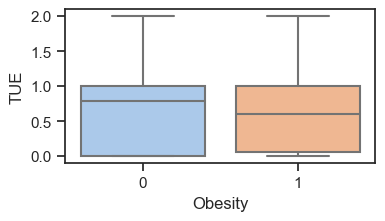

In [107]:
sns.set_style("ticks" , {'axes.grid' : False})
plt.figure(figsize = (6,3))
for col in num_cols:
    plt.tight_layout()
    sns.boxplot(data = obesity, x = 'Target' ,y =  col, palette= "pastel")
    plt.xlabel('Obesity')
    plt.ylabel(col)
    plt.show()

## Train/Test Split of the data set
## One hot encoding and feature scaling 

In [112]:
obesity.isnull().mean().sort_values(ascending= False)
obesity.isnull().sum().sort_values(ascending= False)

Gender        0.0
SMOKE         0.0
MTRANS        0.0
CALC          0.0
TUE           0.0
FAF           0.0
SCC           0.0
CH2O          0.0
CAEC          0.0
Age           0.0
NCP           0.0
FCVC          0.0
FAVC          0.0
Overweight    0.0
Weight        0.0
Height        0.0
Target        0.0
dtype: float64

In [116]:
obesity[cat_cols]

,Gender,Overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation
3,Male,no,no,Sometimes,no,no,Frequently,Walking
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
